Insights

In [6]:
# 1. What are the most popular airports to travel to?
# 2. What days have the greatest number of flights?
# 3. What are the most popular origin and destination Airport combinations?
# 4. Are flights which cover longer distance more likely to be delayed?
# 5. What flights have the greatest difference between Time and Mean Time for that specific origin and destination?


Setup

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

flight_path = 'airlines_delay.csv.zip'
flight_data= pd.read_csv(flight_path)

print('Setup Complete')

flight_data.head()

Setup Complete


,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0


1. What are the most popular airports to travel to?

<Figure size 1000x1000 with 0 Axes>

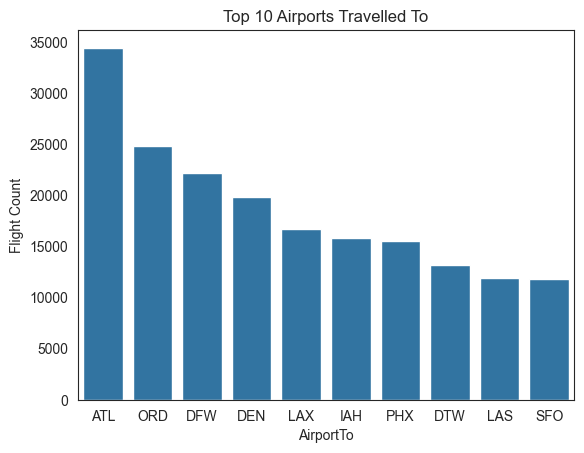

<Figure size 1000x1000 with 0 Axes>

In [127]:
columns = flight_data.columns
#print(columns)

flights_by_airport_to = flight_data.groupby(['AirportTo']).Class.count() #Count of flights to each airport
flights_by_airport_to.sort_values(ascending=False) #Order by count descending

top10 = flights_by_airport_to.sort_values(ascending=False).iloc[0:10] #Select top 10

plt.ylabel('Flight Count')
plt.title('Top 10 Airports Travelled To')
sns.barplot(top10)
plt.figure(figsize = (10,10))


2. What days have the greatest number of flights?

In [93]:
flight_data.head()

def get_day_name(row):
    days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    row['DayName']= days[int(row.DayOfWeek)-1] #Selects the name which correlates to the day number in the week
    return row

day_as_name = flight_data.apply(get_day_name, axis='columns') #Applies the function to all rows to get day name
day_as_name.head()


,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class,DayName
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0,Monday
1,6948.0,360.0,146.0,OO,COS,ORD,4,0,Thursday
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0,Wednesday
3,31.0,1410.0,344.0,US,OGG,PHX,6,0,Saturday
4,563.0,692.0,98.0,FL,BMI,ATL,4,0,Thursday


,DayName,count
3,Monday,72769
4,Tuesday,71340
1,Wednesday,89746
0,Thursday,91445
2,Friday,85247
6,Saturday,58956
5,Sunday,69879


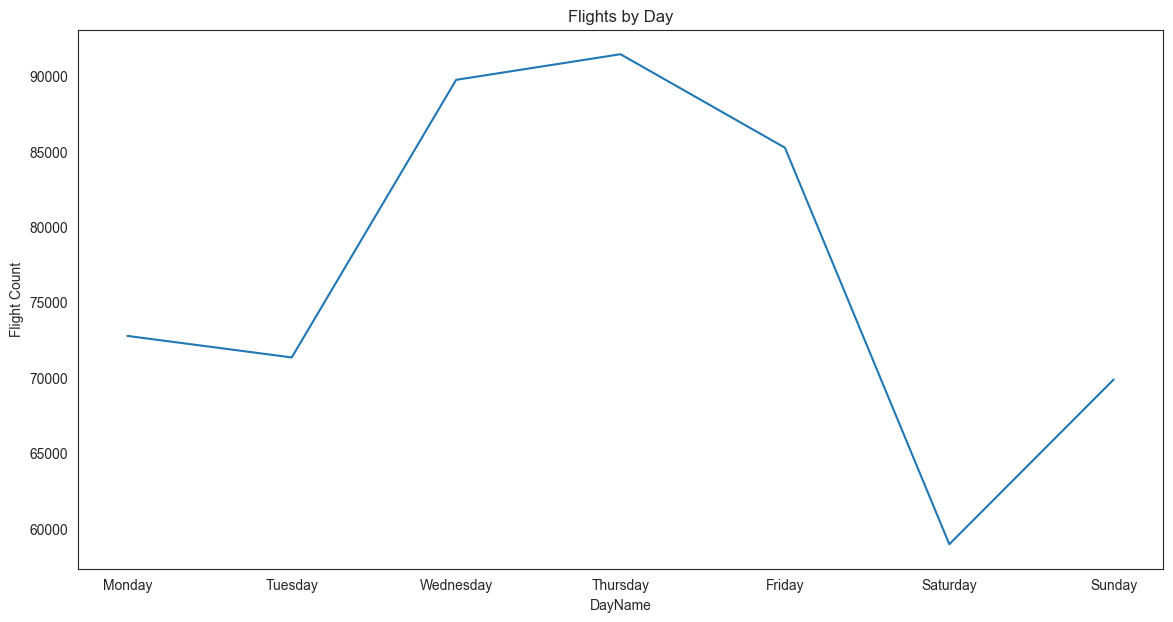

In [116]:
flights_by_day = day_as_name[[ 'DayName', 'DayOfWeek']].value_counts().reset_index().sort_values('DayOfWeek') #Counts flights on each day
plt.figure(figsize=(14,7))
plt.title('Flights by Day')
plt.ylabel('Flight Count')
sns.lineplot(x='DayName', y='count', data=flights_by_day)
flights_by_day[['DayName','count']]


3. What are the most popular origin and destination Airport combinations?

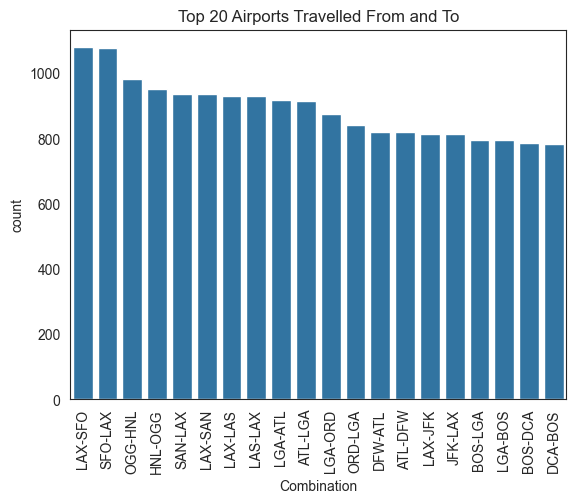

In [119]:
flight_data.head()
origin_and_dest = flight_data[['AirportFrom', 'AirportTo']].value_counts().reset_index().sort_values('count', ascending=False)
#Groups by origin and destination airport and orders them in descending order
origin_and_dest.head()
origin_and_dest['Combination'] = origin_and_dest.AirportFrom + '-' + origin_and_dest.AirportTo #Creates new column which stores the origin and destination airport initials
Top20 = origin_and_dest[['Combination','count']].iloc[0:20] #Selects top 20 index's

plt.xticks(rotation=90) #Increases readability
plt.title('Top 20 Airports Travelled From and To')
sns.barplot(x='Combination', y='count', data=Top20)
sns.set_style('white')

4. Are flights which cover longer distance more likely to be delayed?

In [120]:
def is_delayed(row):
    if row.Class == 1:
        row.Class = True #Replaces 1 with True
    elif row.Class == 0:
        row.Class = False #Replaces 0 with False
    return row

delay_data = flight_data.apply(is_delayed, axis='columns') #Applies function to all rows
delay_data = delay_data.rename(columns={'Class':'Delayed'}) #Rename's the column to define it better
delay_data['Delayed']



0         False
1         False
2         False
3         False
4         False
          ...  
539377     True
539378     True
539379     True
539380     True
539381     True
Name: Delayed, Length: 539382, dtype: bool

250


<Axes: title={'center': 'Flights Length, Grouped by Delayed'}, xlabel='Delayed', ylabel='Length'>

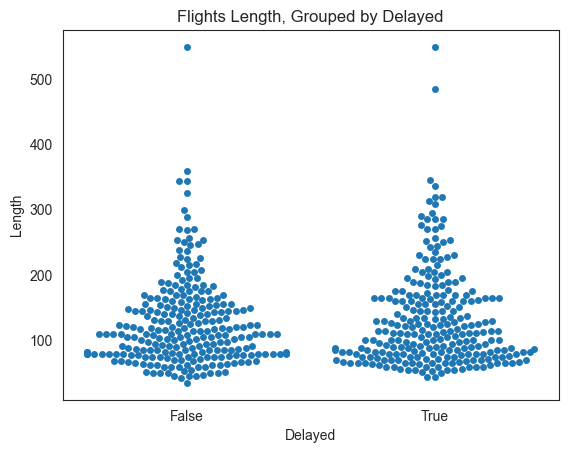

In [128]:
first_250_delayed = delay_data[delay_data['Delayed'] == True].iloc[0:250]  #Selects first 250 rows by index that are delayed
first_250_not_delayed = delay_data[delay_data['Delayed'] == False].iloc[0:250] #Selects first 250 rows by index that are not delayed

#Had to reduce the size of the data frame as >500,000 rows

five_hundred_flights = pd.concat([first_250_delayed, first_250_not_delayed]) #Merges the two dataframes to include 500 rows in a single dataframe

plt.title('Flights Length, Grouped by Delayed')
sns.swarmplot(x=five_hundred_flights['Delayed'], y=five_hundred_flights['Length'])

5. What flights have the greatest difference between Time and Mean Time for that specific origin and destination?

,AirportFrom,AirportTo,Flight,Time,Length,Airline,DayOfWeek,Class,Mean Journey Time,Time Difference
Index,,,,,,,,,,
0,ANC,MSP,2284.0,1305.0,324.0,DL,5,1,389.531250,915.468750
1,PDX,ORD,196.0,1401.0,234.0,UA,7,0,626.381579,774.618421
2,ANC,SEA,106.0,1350.0,202.0,AS,7,0,580.020134,769.979866
3,ANC,SEA,106.0,1350.0,202.0,AS,7,1,580.020134,769.979866
4,PDX,ORD,196.0,1394.0,235.0,UA,7,0,626.381579,767.618421
5,PDX,ORD,196.0,1391.0,235.0,UA,7,0,626.381579,764.618421
6,PDX,ORD,378.0,1390.0,238.0,UA,5,0,626.381579,763.618421
7,PHX,ATL,543.0,1439.0,208.0,FL,7,1,684.180982,754.819018
8,PHX,ATL,543.0,1439.0,208.0,FL,5,0,684.180982,754.819018


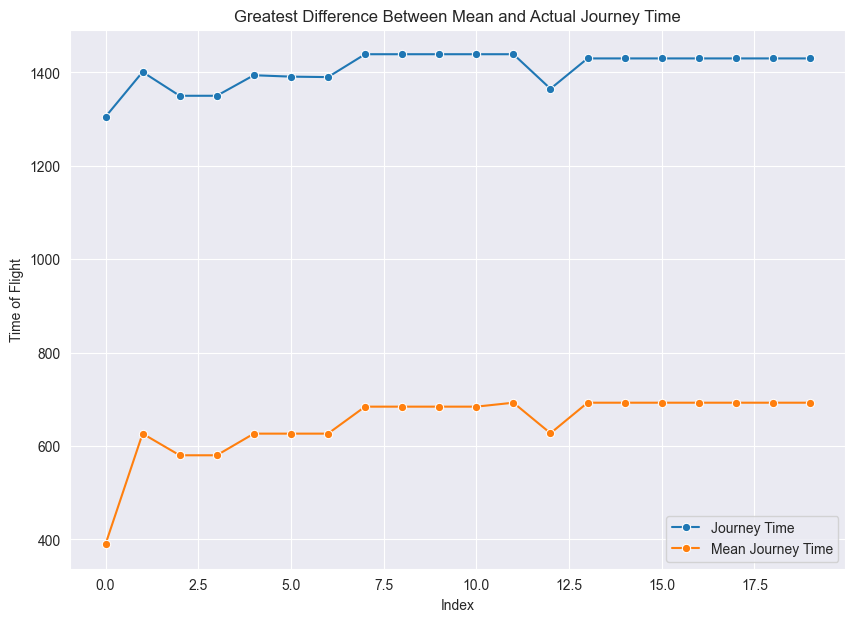

In [4]:
mean_journey_time = flight_data[['AirportFrom', 'AirportTo', 'Time']].groupby(['AirportFrom', 'AirportTo']).Time.mean().reset_index().rename(columns={'Time':'Mean Journey Time'}) #Groups data by origin and destination airport and computes the mean journey time for each combination

#mean_journey_time.head()
left = flight_data.set_index(['AirportFrom', 'AirportTo']) #Defines what to join on
right = mean_journey_time.set_index(['AirportFrom', 'AirportTo']) #Defines what to join on from right dataframe/table

with_mean = left.join(right) #Joins the dataframes where the defined values match



with_mean['Time Difference'] = with_mean['Time'] - with_mean['Mean Journey Time'] #calculates difference between mean and actual journey time and saves it as an additional column

delayed_most = with_mean.sort_values(by=['Time Difference'], ascending=False).drop_duplicates().iloc[0:20].reset_index() #Sorts to include the largest time difference first

delayed_most.index.name = 'Index'

plt.figure(figsize = (10,7))
plt.title('Greatest Difference Between Mean and Actual Journey Time')
sns.lineplot(data=delayed_most['Time'], marker='o', label='Journey Time')
sns.lineplot(data=delayed_most['Mean Journey Time'], marker='o', label='Mean Journey Time')
plt.ylabel('Time of Flight')

delayed_most